<a href="https://colab.research.google.com/github/pranjul6386/covid_rfmd/blob/master/resnet_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/My Drive/kaggle_notebooks/RMFD.zip"

In [ ]:
import os
import numpy as np
import cv2
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import *
from keras import optimizers
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint

In [ ]:
img = cv2.imread('/content/images/nomask/benxi/0_0_benxi_0013.jpg', cv2.IMREAD_UNCHANGED)
 
# get dimensions of image
dimensions = img.shape

 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (127, 125, 3)
Image Height       :  127
Image Width        :  125
Number of Channels :  3


In [ ]:
list_images=[]
labels=[]

In [ ]:
for filename in os.listdir("/content/images/nomask"):
  for img in os.listdir("/content/images/nomask" + "/" + filename):
    path= str("/content/images/nomask" + "/"+ filename + "/" + img)
    try:

      image=cv2.imread(path)
    except:
      print("file not found error")

      continue
    image=cv2.resize(image,(224,224))
    arr=np.array(image)
    list_images.append(arr)
    labels.append("unmasked")
    if len(list_images)>2000:
      break

In [ ]:
for filename in os.listdir("/content/images/mask"):
  for img in os.listdir("/content/images/mask" + "/" + filename):
    path= str("/content/images/mask" + "/"+ filename + "/" + img)
    try:

      image=cv2.imread(path)
    except:
      print("file not found error")

      continue
    image=cv2.resize(image,(224,224))
    arr=np.array(image)
    list_images.append(arr)
    labels.append("masked")

In [ ]:
len(list_images)

4653

In [ ]:
list_images

In [ ]:
len(labels)

4653

In [ ]:
y_train=np.array(labels)
labelencoder=LabelEncoder()

y_train=labelencoder.fit_transform(y_train)

In [ ]:
y_train.shape

(4653,)

In [ ]:
x_train=np.array(list_images)

In [ ]:
x_train.shape

(4653, 224, 224, 3)

In [ ]:
!unzip "/content/drive/MyDrive/kaggle_notebooks/resnet50_weights_tf_dim_ordering_tf_kernels.h5.zip"

Archive:  /content/drive/MyDrive/kaggle_notebooks/resnet50_weights_tf_dim_ordering_tf_kernels.h5.zip
  inflating: resnet50_weights_tf_dim_ordering_tf_kernels.h5  


In [ ]:
!pip install resnet

  Created wheel for resnet: filename=resnet-0.1-cp37-none-any.whl size=10044 sha256=ce85f0502275e00f4b5ac120dfbf9ec69248051b906ff6b67b5c5f800283d082
  Stored in directory: /root/.cache/pip/wheels/f6/15/ce/e3fe2b3a504698765a1b2dfb05ed4a91fcc0f38c8e57568658
Successfully built resnet


In [ ]:
!pip list | grep Keras

Keras                         2.4.3              
Keras-Preprocessing           1.1.2              


In [ ]:
!pip uninstall Keras
!pip install Keras==2.3.1

!pip uninstall Keras-Applications
!pip install Keras-Applications==1.0.8

!pip uninstall Keras-Preprocessing
!pip install Keras-Preprocessing==1.1.0

# FEATURE EXTRACTION

In [ ]:
import time
import numpy as np
import tensorflow as tf
import tensorflow.keras.applications.resnet50
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.python.keras.applications.inception_v3 import preprocess_input
#from tensorflow.python.keras.applications.inception_resnet_v2 import preprocess_input

resnet_weights_path = '/content/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
#inceptionv3_weights_path = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
#inceptionresnetv2_weights_path = '../input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)



102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
t=model.predict(x_train)

In [ ]:
t.shape

(4653, 2048)

In [ ]:
y_train.shape

(4653,)

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(t, y_train, test_size=0.2)

# SUPPORT VECTOR **MACHINES**

In [ ]:
import time
start = time.time()

from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, Ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

Running time: 3.5963 seconds


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Ytest, preds))

0.9957035445757251


Text(0.5, 1.0, 'Confusion Matrix')

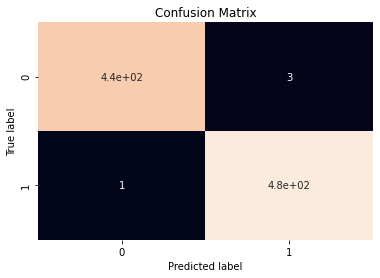

In [ ]:
import seaborn as sns
cm = confusion_matrix(Ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       446
           1       0.99      1.00      1.00       485

    accuracy                           1.00       931
   macro avg       1.00      1.00      1.00       931
weighted avg       1.00      1.00      1.00       931



In [ ]:
Ytrain.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
print(Ytrain.shape)
print(Xtrain.shape)

(3722,)
(3722, 2048)


# Decision tree classsifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_des = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf_des.fit(Xtrain, Ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
preds_des=clf_des.predict(Xtest)

0.9785177228786252
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       436
           1       0.98      0.98      0.98       495

    accuracy                           0.98       931
   macro avg       0.98      0.98      0.98       931
weighted avg       0.98      0.98      0.98       931



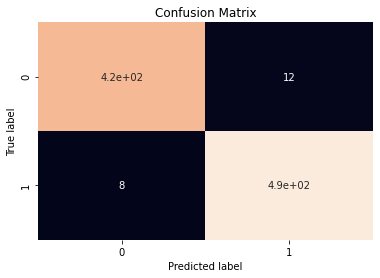

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Ytest, preds_des))
cm1 = confusion_matrix(Ytest, preds_des)
sns.heatmap(cm1, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_des))

# RaNDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(Xtrain, Ytrain)

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.99      1.00      0.99       495

    accuracy                           0.99       931
   macro avg       0.99      0.99      0.99       931
weighted avg       0.99      0.99      0.99       931



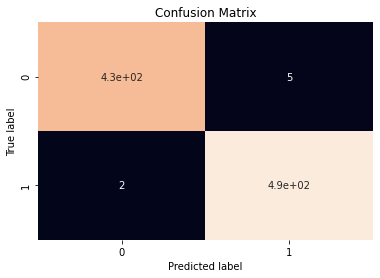

In [ ]:
preds_rf=rf_best.predict(Xtest)
cm4 = confusion_matrix(Ytest, preds_rf)
sns.heatmap(cm4, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_rf))

# KNN CLASSSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(Xtrain, Ytrain)

#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)


{'n_neighbors': 4}


Compare all 3


In [ ]:
print('knn: {}'.format(knn_best.score(Xtest, Ytest)))
print('rf: {}'.format(rf_best.score(Xtest,Ytest)))
print('clf: {}'.format(clf.score(Xtest, Ytest)))

knn: 0.9935553168635876
rf: 0.9924812030075187
clf: 0.9957035445757251


# Ensemble Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('svm', clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(Xtrain, Ytrain)
#test our model on the test data
ensemble.score(Xtest, Ytest)

0.9946294307196563

In [ ]:
preds_en=ensemble.predict(Xtest)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.99      1.00      0.99       495

    accuracy                           0.99       931
   macro avg       0.99      0.99      0.99       931
weighted avg       0.99      0.99      0.99       931



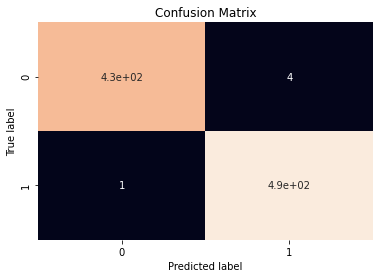

In [ ]:
cm5 = confusion_matrix(Ytest, preds_en)
sns.heatmap(cm5, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_en))